# Domaći zadatak - Mushroom classification

### *Studenti: Milica Spasić - br. indeksa 1207, Irena Đorđević - br. indeksa 1048*

Za prvi domaći izabran je skup podataka koji opisuje pečurke i nalazi se na linku: https://archive.ics.uci.edu/ml/datasets/mushroom.
Cilj je utvrditi da li je pečurka jestiva ili ne.

## 1. Učitavanje, analiza, i priprema podataka

Svi atributi skupa podataka su kategoričke vrednosti i prikazani su u nastavku:

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_classif
from sklearn.ensemble import *
from sklearn.linear_model import *

In [2]:
header = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [3]:
data = pd.read_csv("agaricus-lepiota.data", names=header)

In [4]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


U nastavku možemo videti opis atributa

Attribute Information: (classes: edible=e, poisonous=p)    


     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,  
                                  knobbed=k,sunken=s  
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s  
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,  
                                  pink=p,purple=u,red=e,white=w,yellow=y  
     4. bruises?:                 bruises=t,no=f  
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,  
                                  musty=m,none=n,pungent=p,spicy=s  
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n  
     7. gill-spacing:             close=c,crowded=w,distant=d  
     8. gill-size:                broad=b,narrow=n  
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,  
                                  green=r,orange=o,pink=p,purple=u,red=e,  
                                  white=w,yellow=y  
    10. stalk-shape:              enlarging=e,tapering=t  
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,  
                                  rhizomorphs=z,rooted=r,missing=?  
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s  
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s  
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,  
                                  pink=p,red=e,white=w,yellow=y  
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,  
                                  pink=p,red=e,white=w,yellow=y  
    16. veil-type:                partial=p,universal=u  
    17. veil-color:               brown=n,orange=o,white=w,yellow=y  
    18. ring-number:              none=n,one=o,two=t  
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,  
                                  none=n,pendant=p,sheathing=s,zone=z  
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,  
                                  orange=o,purple=u,white=w,yellow=y  
    21. population:               abundant=a,clustered=c,numerous=n,  
                                  scattered=s,several=v,solitary=y  
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,  
                                  urban=u,waste=w,woods=d  

U nastavku je prikazana deskriptivna analiza ovih kategoričkih atributa.

In [5]:
data.describe(include = "all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
def features_countplot(df):
    fig, axs = plt.subplots(6, 4, figsize=(25,30), constrained_layout=True)
    for i, f in enumerate(df.columns):
        sns.countplot(x=f, data=df, ax=axs[i//4][i%4], palette="Set2")
    plt.show()

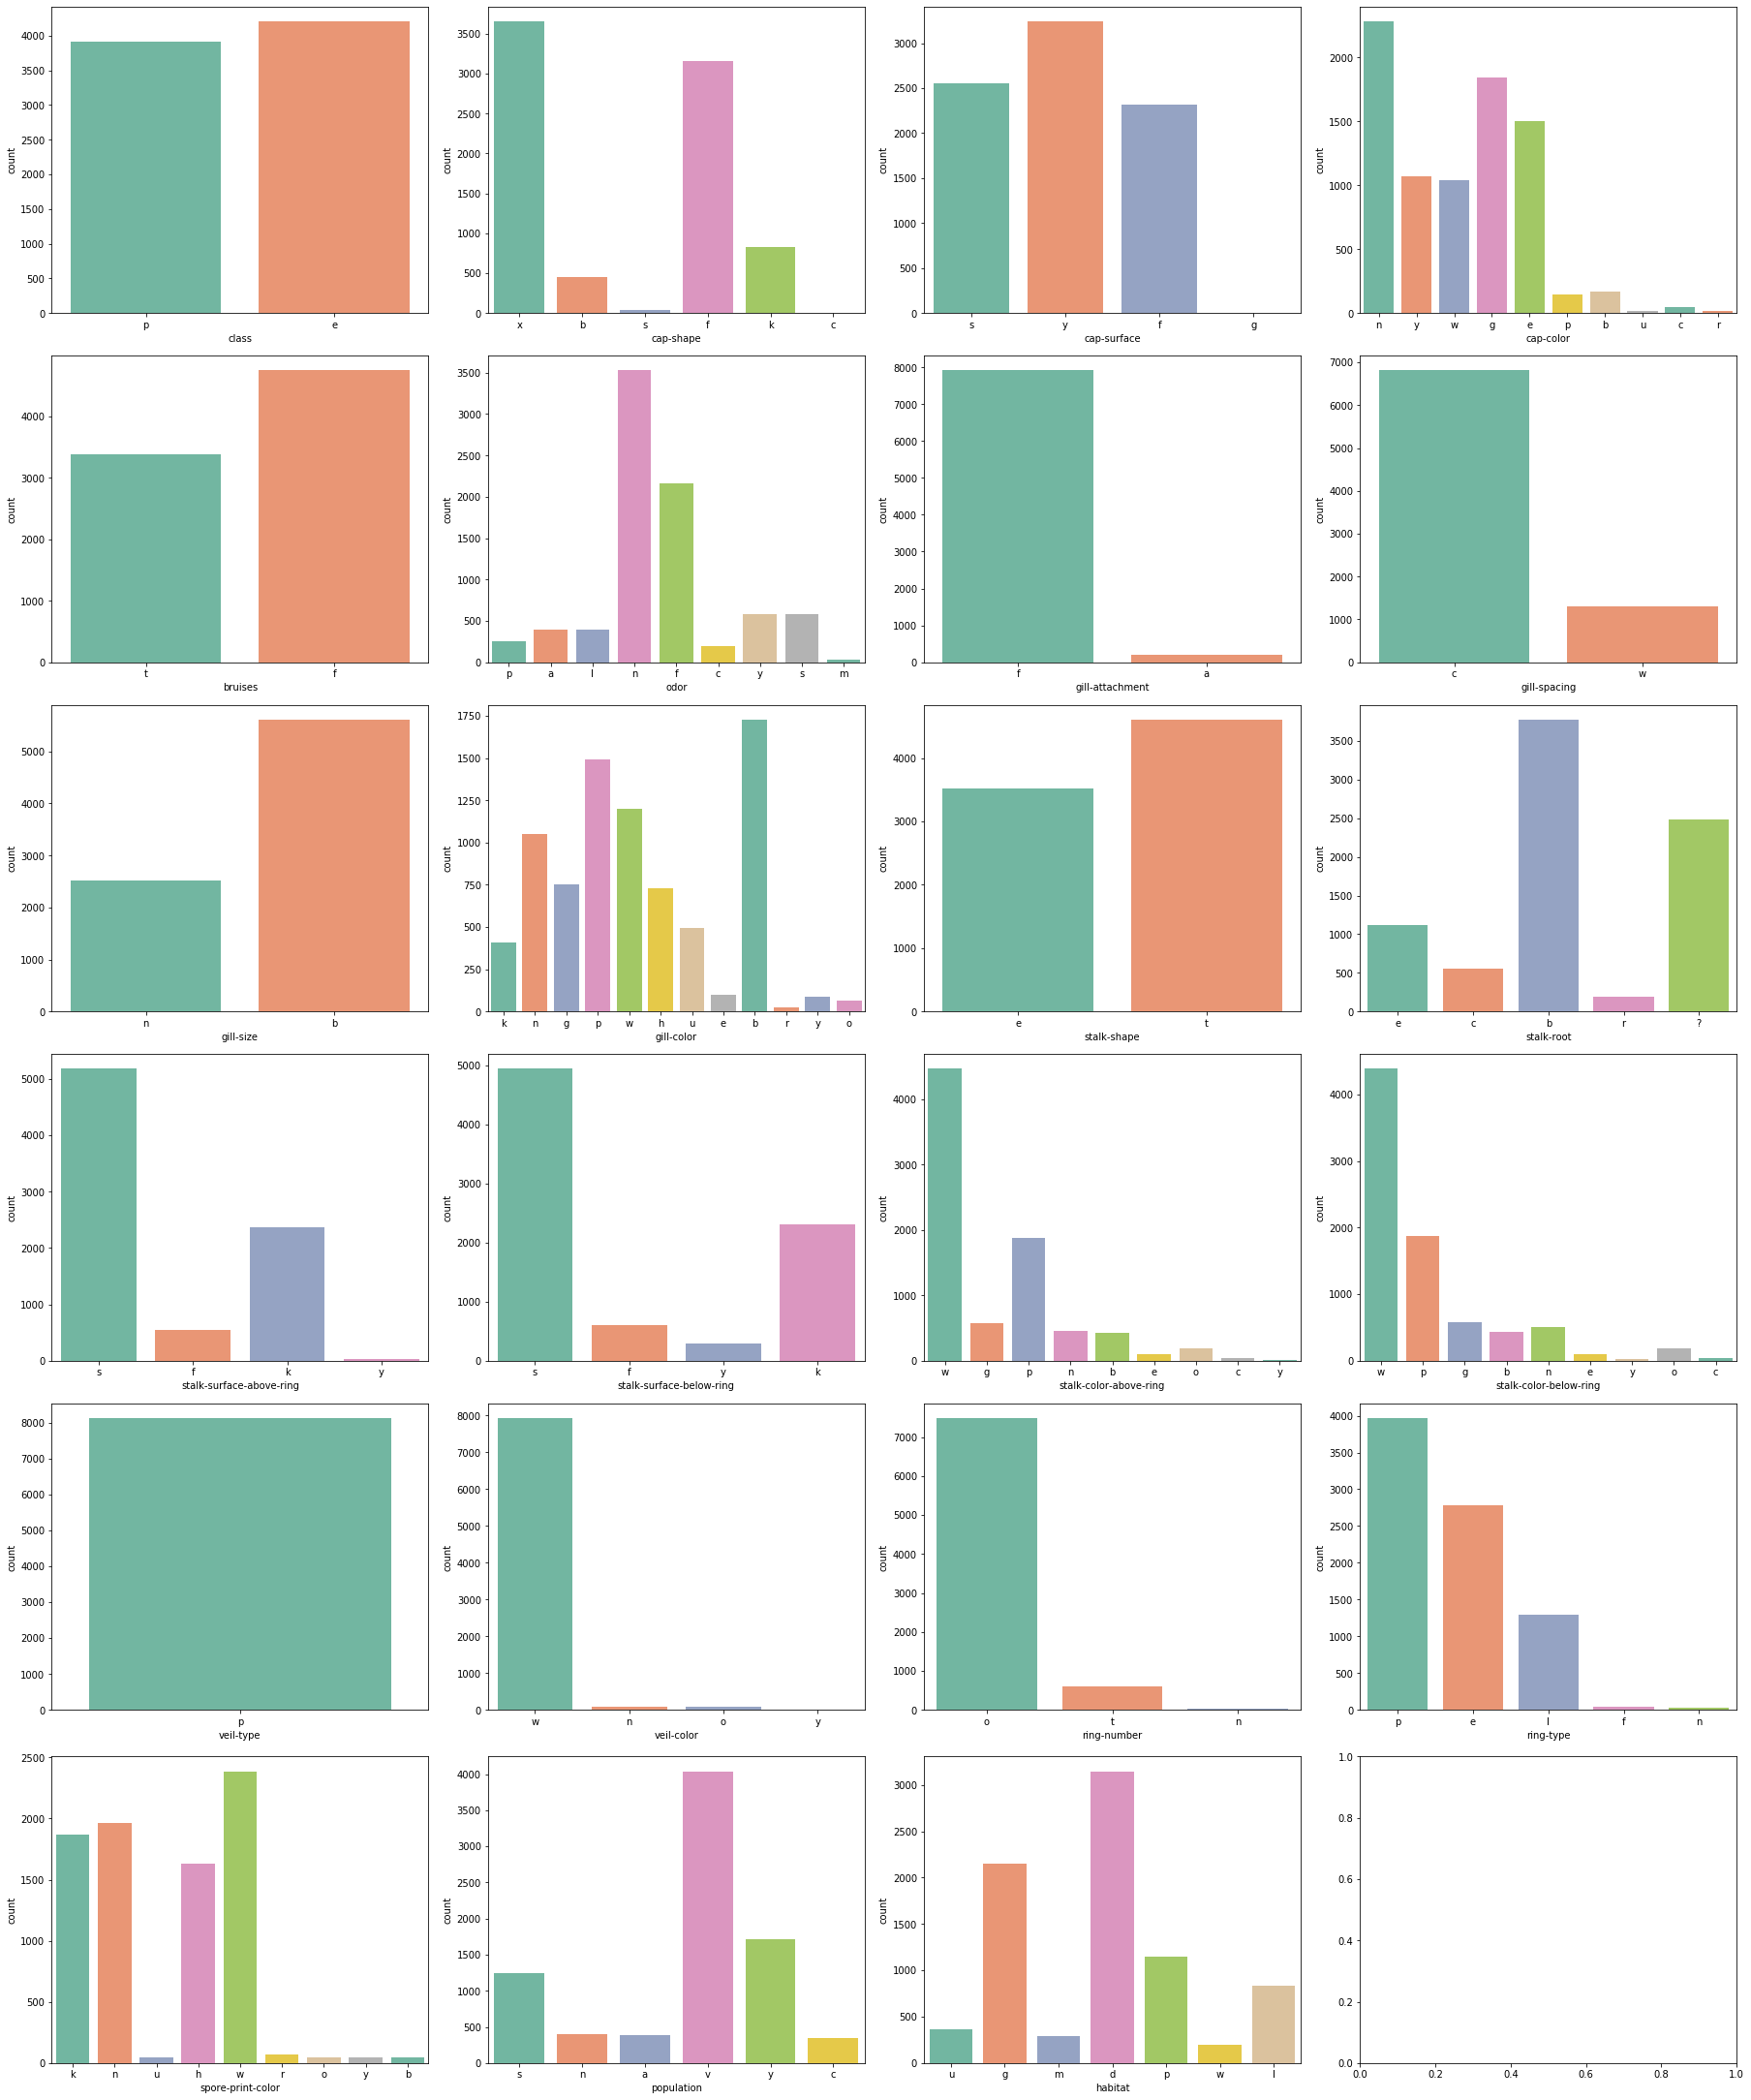

In [7]:
features_countplot(data)

In [8]:
data["stalk-root"]

0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object

In [9]:
len(np.where(data['stalk-root']=='?')[0])

2480

Prethodnom analizom može se uvideti da za atribut stalk-root postoji puno primera koji su labelirani kao missing (?). Kako ti podaci nisu od pomoći, ceo atribut se neće uzimati u obzir. Takođe, atribut veil-type poseduje samo jednu vrednost kroz ceo skup podataka te se ni on neće uzimati u obzir.

In [10]:
data = data.drop(columns = ["stalk-root", "veil-type"])

## 1.1 Transformacija podataka

Kako su svi atributi kategorički, neophodno je prevesti ih u one-hot encoding oblik.

In [11]:
data_transformed = pd.DataFrame()
for column in data.columns:
    if column == 'class':
        continue
    one_hot = pd.get_dummies(data[column])
    old_columns = one_hot.columns
    one_hot.columns = [col + "_" + column for col in old_columns]
    data_transformed = pd.concat([data_transformed, one_hot], axis=1, sort=False)

In [12]:
labels = data["class"]
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(labels)

le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'e': 0, 'p': 1}


In [13]:
data_transformed

,b_cap-shape,c_cap-shape,f_cap-shape,k_cap-shape,s_cap-shape,x_cap-shape,f_cap-surface,g_cap-surface,s_cap-surface,y_cap-surface,...,s_population,v_population,y_population,d_habitat,g_habitat,l_habitat,m_habitat,p_habitat,u_habitat,w_habitat
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


## 1.2 Odabir atributa


Kako ima puno atributa od kojih neki mogu biti redudantni jer su visoko korelisani, vrši se dodatna redukcija i analiza.


In [14]:
def df_corr_coeff(df, coeff):
    table = []
    upper = df.corr().where(np.triu(np.ones(df.corr().shape), k=1).astype(np.bool))
    for col in df.corr().columns:
        for i, val in enumerate(list(upper[col].dropna().values)):
            if abs(val) >= coeff:
                table.append((upper[col].dropna().name, df.corr().columns[i], val))
    table = pd.DataFrame(table, columns=["Feature 1", "Feature 2", "Correlation"])
    return table

In [15]:
df_corr_coeff(data_transformed, 0.9)

,Feature 1,Feature 2,Correlation
0,t_bruises,f_bruises,-1.000000
1,f_gill-attachment,a_gill-attachment,-1.000000
2,w_gill-spacing,c_gill-spacing,-1.000000
3,n_gill-size,b_gill-size,-1.000000
4,t_stalk-shape,e_stalk-shape,-1.000000
5,c_stalk-color-above-ring,m_odor,1.000000
6,o_stalk-color-above-ring,a_gill-attachment,0.955097
7,o_stalk-color-above-ring,f_gill-attachment,-0.955097
8,c_stalk-color-below-ring,m_odor,1.000000
9,c_stalk-color-below-ring,c_stalk-color-above-ring,1.000000


In [16]:
def del_perfect_corr(df):
    
    features = df_corr_coeff(df, 1)
    if features.shape[0] == 0:
        return df
    features_groups = [{features["Feature 1"][0], features["Feature 2"][0]}]
    for i in range(1, features.shape[0]):
        if features["Feature 1"][i] not in set.union(*features_groups) and features["Feature 2"][i] not in set.union(*features_groups):
            features_groups.append({features["Feature 1"][i], features["Feature 2"][i]})
        elif features["Feature 1"][i] in set.union(*features_groups) and features["Feature 2"][i] in set.union(*features_groups):
            continue
        else:
            for group in features_groups:
                if features["Feature 1"][i] in group or features["Feature 2"][i] in group:
                    group.add(features["Feature 1"][i])
                    group.add(features["Feature 2"][i])
                    break
    for group in features_groups:
        group.pop()
        df = df.drop(group, axis=1)
        print(group)        
    return df

In [17]:
df2 = del_perfect_corr(data_transformed)

{'f_bruises'}
{'a_gill-attachment'}
{'c_gill-spacing'}
{'e_stalk-shape'}
{'m_odor', 'n_ring-type', 'c_stalk-color-above-ring', 'c_stalk-color-below-ring'}
{'o_stalk-color-above-ring'}
{'y_veil-color'}


In [18]:
df2

,b_cap-shape,c_cap-shape,f_cap-shape,k_cap-shape,s_cap-shape,x_cap-shape,f_cap-surface,g_cap-surface,s_cap-surface,y_cap-surface,...,s_population,v_population,y_population,d_habitat,g_habitat,l_habitat,m_habitat,p_habitat,u_habitat,w_habitat
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Sada možemo vizualizovati raspodelu različitih atributa po klasama i odatle steći uvid u to koji atribut će biti najdistinktivniji. Jedan od njih jeste *odor*.

In [19]:

def feature_target_dist(df):
    fig, axs = plt.subplots(5, 4, figsize=(20,20), constrained_layout=True)
    for i, f in enumerate(df.drop("class", axis=1).columns):
        sns.countplot(x=f, hue="class", data=df, ax=axs[i//4][i%4], palette="Set2")
    plt.show()

In [20]:
full_data = data
full_data["class"] = labels

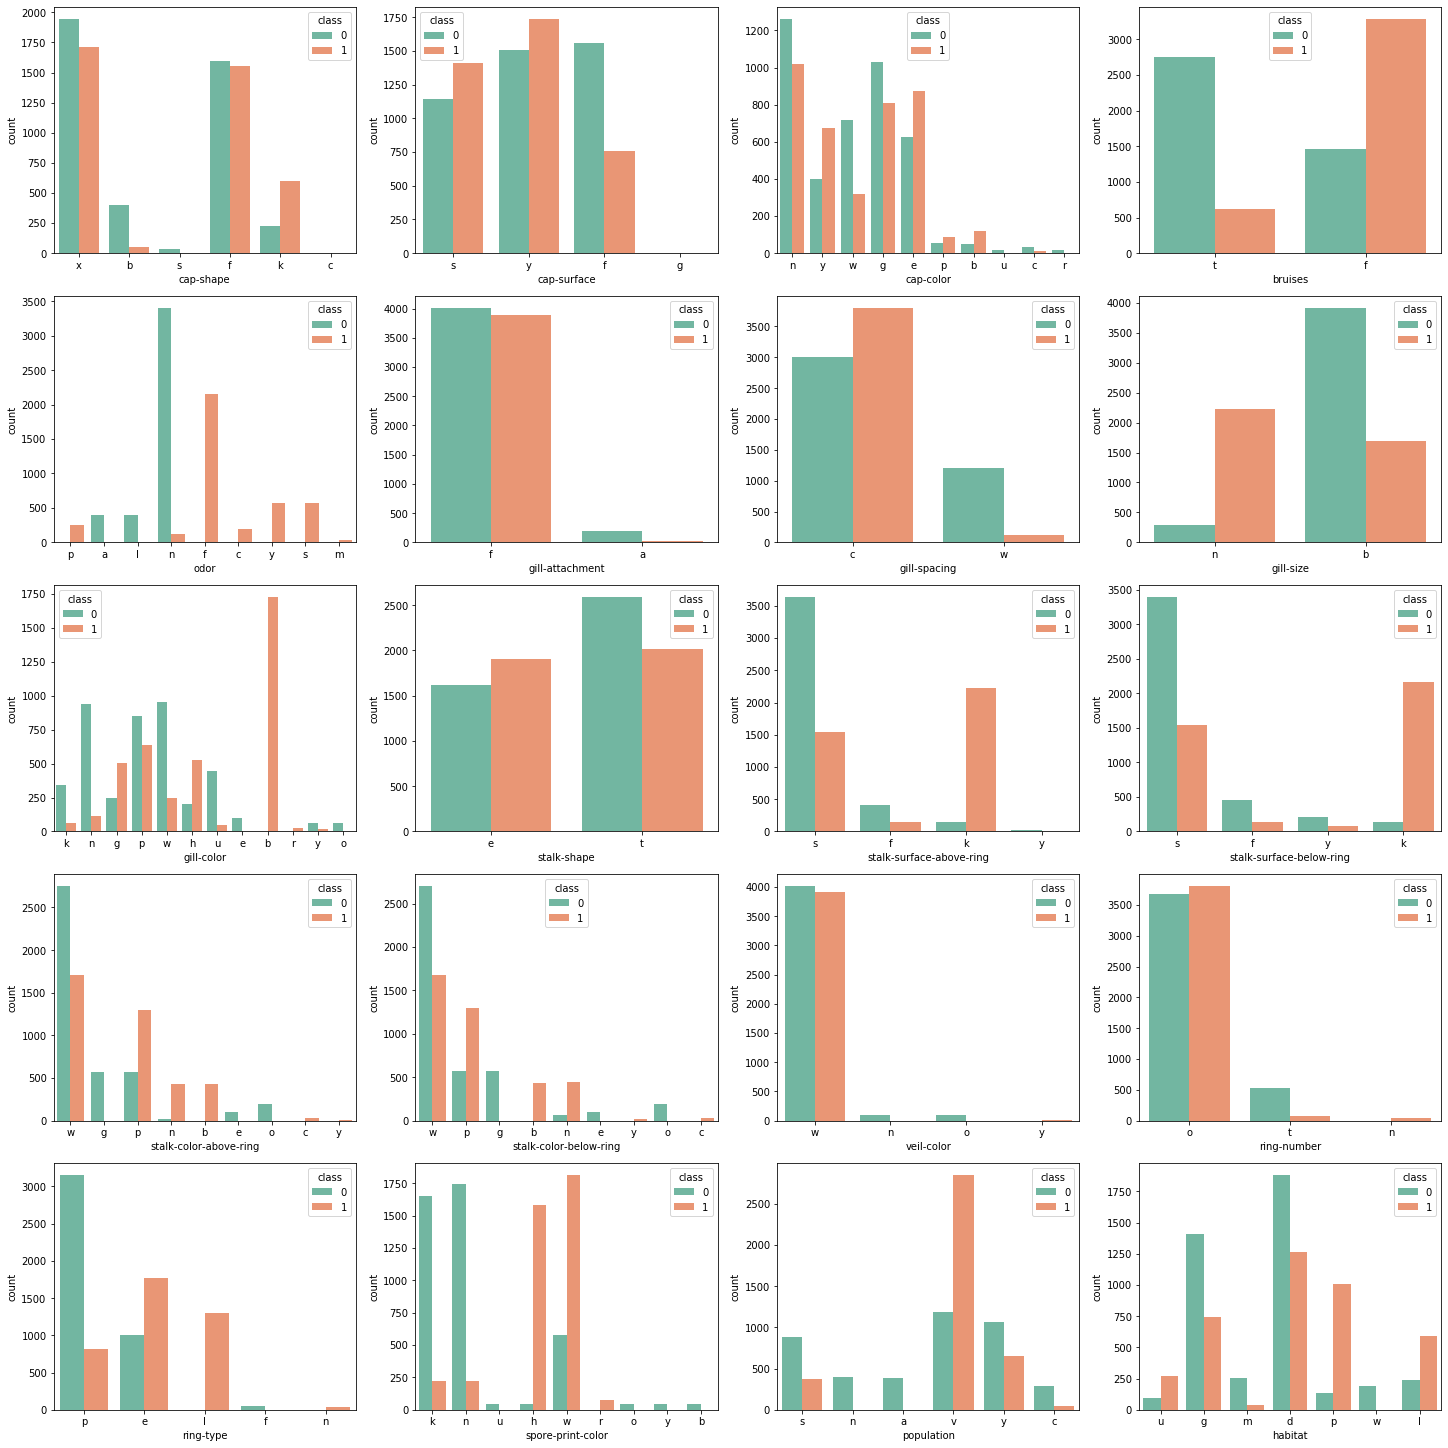

In [21]:
feature_target_dist(full_data)

Različite statističke metrike sada mogu da nam ukažu na to koji atributi su od najvećeg značaja za klasifikaciju.

In [22]:

def stat_scores(X, y, n):
    
    mi = mutual_info_classif(X, y, random_state=10)
    rfi = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=10).fit(X, y).feature_importances_
    eti = ExtraTreesClassifier(n_estimators=100, random_state=10).fit(X, y).feature_importances_

    plt.title("Mutual Information stats")
    plot_feature_rank(X, mi, n)
    
    plt.title("Random Forest Importance")
    plot_feature_rank(X, rfi, n)
    
    plt.title("Extra Trees Importance")
    plot_feature_rank(X, eti, n)


def plot_feature_rank(X, stat, n):
    pd.Series(stat).sort_values(ascending=False).nlargest(n).plot.bar(figsize = (16,4))
    plt.xticks(range(0,n), X.columns[pd.Series(stat).sort_values(ascending=False).nlargest(n).index], rotation=20)
    plt.show()

In [23]:
X, y = data_transformed, labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)

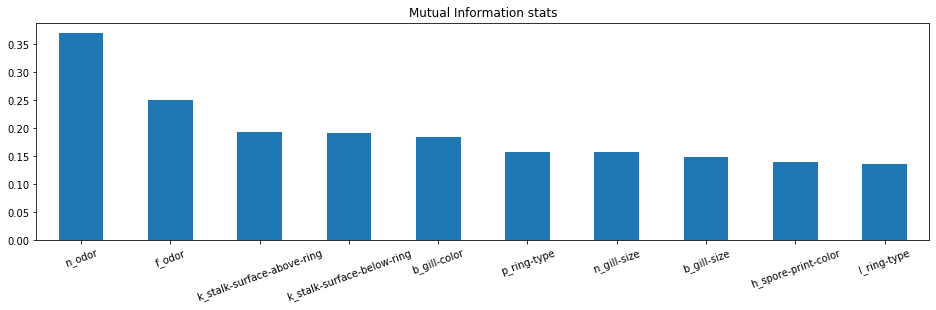

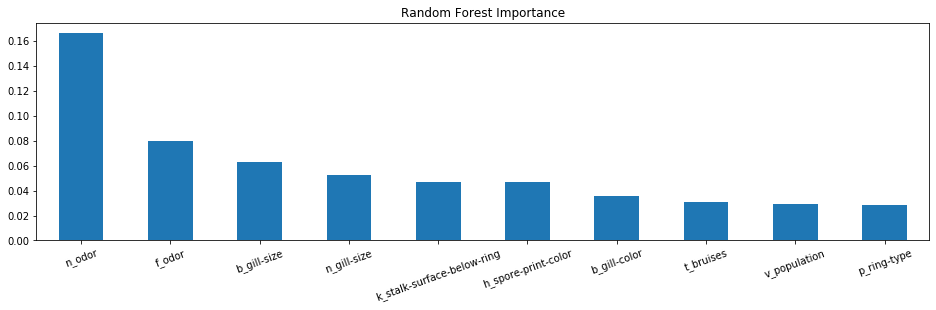

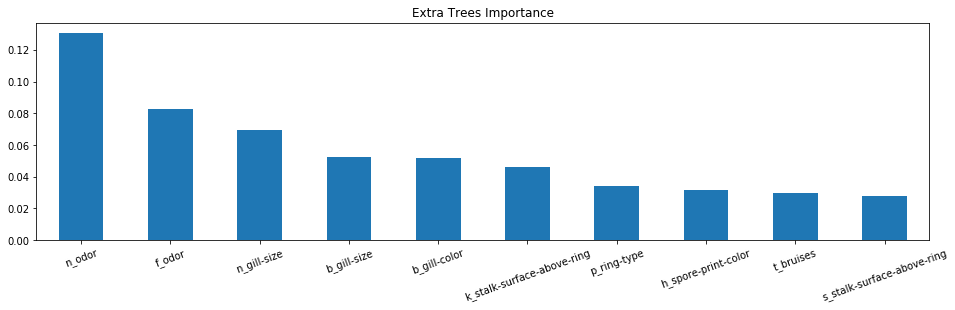

In [24]:
stat_scores(X_train, y_train, 10)

## 2. Model

Prvi model koji je isproban jeste stablo odlučivanja, koji je veoma interpretabilan. Pored same vizualizacije stabla, možemo prikazati i bitnost atributa preko ovog klasifikatora.

In [25]:
import matplotlib.pyplot as plt

In [26]:
from sklearn.tree import *
from sklearn import tree


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
features = X.columns

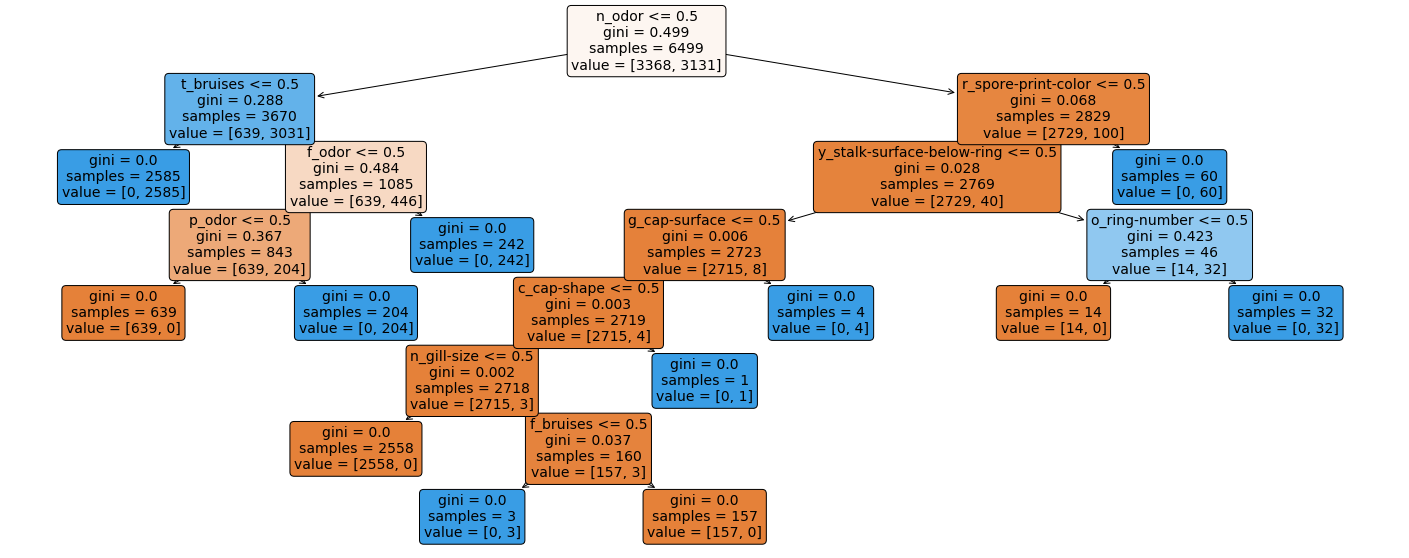

In [28]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(dt,
                    feature_names = features,
                    filled=True,  
                    rounded=True, 
                    fontsize=14)

In [29]:
y_predict = dt.predict(X_test)

In [30]:
importance_dict = {}

Feature: n_odor, Score: 0.6153025009273155
Feature: t_bruises, Score: 0.16336456016753426
Feature: p_odor, Score: 0.09530042501489422
Feature: f_odor, Score: 0.06658112913821818
Feature: r_spore-print-color, Score: 0.03515554257601554
Feature: y_stalk-surface-below-ring, Score: 0.013377720928727197
Feature: o_ring-number, Score: 0.006002215290172767
Feature: g_cap-surface, Score: 0.0024543370124287503
Feature: f_bruises, Score: 0.0018142298615636578
Feature: c_cap-shape, Score: 0.0006147129952946629
Feature: n_gill-size, Score: 3.262608783534711e-05
Feature: b_cap-shape, Score: 0.0
Feature: f_cap-shape, Score: 0.0
Feature: k_cap-shape, Score: 0.0
Feature: s_cap-shape, Score: 0.0
Feature: x_cap-shape, Score: 0.0
Feature: f_cap-surface, Score: 0.0
Feature: s_cap-surface, Score: 0.0
Feature: y_cap-surface, Score: 0.0
Feature: b_cap-color, Score: 0.0
Feature: c_cap-color, Score: 0.0
Feature: e_cap-color, Score: 0.0
Feature: g_cap-color, Score: 0.0
Feature: n_cap-color, Score: 0.0
Feature: 

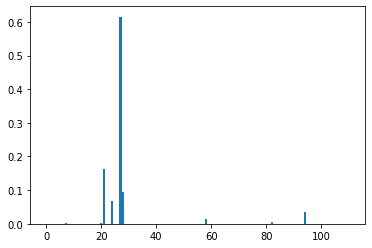

In [31]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
    importance_dict[features[i]] = v
    
sorted_importance_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)}
for key in sorted_importance_dict:
	print('Feature: {}, Score: {}'.format(key, sorted_importance_dict[key]))
    
plt.bar([x for x in range(len(sorted_importance_dict))], importance)
plt.show()

In [32]:
from sklearn.metrics import *

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Ovaj dataset je takav da se njihova pravilnost može lako naučiti pomoću stabala. Treniranje sa različitim modelima je dato u nastavku. Pored pojedinačnih modela, formiran je i ensamble model koji radi po principu glasanja na osnovu pojedinačnih modela i to na osnovu verovatnoće predikcije.

In [55]:
# Importing required classification algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import *
import xgboost
from sklearn import tree
from sklearn import metrics
# Creating object for each class and storing into the array
from IPython.display import display, HTML


def run_clf(data, X_train, X_test, y_train, y_test, name, clf):

    print(name)
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
    y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
    print("Model accuracy: ", clf.score(X_test, y_test))
    print("Number of mislabeled points from %d points : %d"% (X_test.shape[0], (y_test!= y_pred).sum()))

    confusion_matrix=metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix \n", confusion_matrix)
    
    accuracy=metrics.accuracy_score(y_test, y_pred)
    precision=metrics.precision_score(y_test, y_pred)
    recall=metrics.recall_score(y_test, y_pred)
    f1=metrics.f1_score(y_test, y_pred)
    split_metrics = [accuracy, precision, recall, f1]

    cv_acc = cross_val_score(clf, data, labels, cv=10, scoring='accuracy')
    print("Cross validation accuracy : ", cv_acc.mean())
    print("\n")
    cv_precision = cross_val_score(clf, data, labels, cv=5, scoring='precision')
    #print("Cross validation precision : ", scores.mean())
    cv_recall = cross_val_score(clf, data, labels, cv=5, scoring='recall')
    #print("Cross validation recall : ", scores.mean())
    cv_f1 = cross_val_score(clf, data, labels, cv=5, scoring='f1_macro')
    #print("Cross validation F1 : ", scores.mean())
    cv_metrics = [cv_acc.mean(), cv_precision.mean(), cv_recall.mean(), cv_f1.mean()]

    return split_metrics, cv_metrics

In [56]:
def run_classifiers(data, labels):

    X, y = data, labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=91, test_size=0.1)

    classifiers = []
    lr_model= LogisticRegression()
    classifiers.append(("Logistic Regression Classifier", lr_model))
    dt_model = tree.DecisionTreeClassifier()
    classifiers.append(("Decision Tree Classifier", dt_model))
    rf_model = RandomForestClassifier()
    classifiers.append(("Random Forest Classifier", rf_model))
    xgb_model = xgboost.XGBClassifier()
    classifiers.append(("XG Boost Classifier", xgb_model))
    knn_model = KNeighborsClassifier()
    classifiers.append(("KNN Classifier", knn_model))

    all_metrics = []
    all_cv_metrics = []
    for name, clf in classifiers:
        metrics, cv_metrics = run_clf(data, X_train, X_test, y_train, y_test, name, clf)
        all_metrics.append(metrics)
        all_cv_metrics.append(cv_metrics)

    ensamble = VotingClassifier(estimators=classifiers, voting='soft')
    metrics, cv_metrics = run_clf(data, X_train, X_test, y_train, y_test, name = 'Ensamble', clf = ensamble)
    all_metrics.append(metrics)
    all_cv_metrics.append(cv_metrics)

    print("One split metrics")
    vis1 = pd.DataFrame(all_metrics, columns=["accuracy", "precision", "recall", "f1"], index=['Logistic regression', 'Decision tree', 'Random Forest Classifier', "XG Boost Classifier", "KNN Classifier", "Ensamble"])

    display(vis1)

    print("Cross-validation metrics")
    vis2 = pd.DataFrame(all_cv_metrics, columns=["accuracy", "precision", "recall", "f1"], index=['Logistic regression', 'Decision tree', 'Random Forest Classifier', "XG Boost Classifier", "KNN Classifier", "Ensamble"])

    
    display(vis2)

run_classifiers(df2, labels)

Logistic Regression Classifier
Model accuracy:  0.997539975399754
Number of mislabeled points from 813 points : 2
Confusion Matrix 
 [[425   0]
 [  2 386]]
Cross validation accuracy :  0.9768521379795079


Decision Tree Classifier
Model accuracy:  1.0
Number of mislabeled points from 813 points : 0
Confusion Matrix 
 [[425   0]
 [  0 388]]
Cross validation accuracy :  0.968265379698132


Random Forest Classifier
Model accuracy:  1.0
Number of mislabeled points from 813 points : 0
Confusion Matrix 
 [[425   0]
 [  0 388]]
Cross validation accuracy :  0.9655560200922206


XG Boost Classifier
Model accuracy:  1.0
Number of mislabeled points from 813 points : 0
Confusion Matrix 
 [[425   0]
 [  0 388]]
Cross validation accuracy :  0.9685116851168513


KNN Classifier
Model accuracy:  1.0
Number of mislabeled points from 813 points : 0
Confusion Matrix 
 [[425   0]
 [  0 388]]
Cross validation accuracy :  0.9603795163567399


Ensamble
Model accuracy:  1.0
Number of mislabeled points from 813

,accuracy,precision,recall,f1
Logistic regression,0.99754,1.0,0.994845,0.997416
Decision tree,1.00000,1.0,1.000000,1.000000
Random Forest Classifier,1.00000,1.0,1.000000,1.000000
XG Boost Classifier,1.00000,1.0,1.000000,1.000000
KNN Classifier,1.00000,1.0,1.000000,1.000000
Ensamble,1.00000,1.0,1.000000,1.000000


,accuracy,precision,recall,f1
Logistic regression,0.976852,0.915317,0.981367,0.912186
Decision tree,0.968265,0.937008,0.998212,0.996303
Random Forest Classifier,0.965556,0.944066,0.934183,0.917012
XG Boost Classifier,0.968512,0.940827,0.998467,0.957583
KNN Classifier,0.960380,0.925180,0.942090,0.909672
Ensamble,0.965556,0.947319,0.998212,0.949720


Sada isprobavamo klasifikaciju sa smanjenim brojem atributa. Najpre smo simulirali posmatrača koji ima anosmiju, odnosno ne razlikuje mirise. Takođe ovaj atribut je izvučen kao najznačajniji. Rezultati su i bez njega nepogrešivi.

In [52]:
to_remove = []
for col in df2.columns:
    if "odor" in col:
        to_remove.append(col)
df_reduced = df2.drop(columns = to_remove)

In [57]:
run_classifiers(df_reduced, labels)

Logistic Regression Classifier
Model accuracy:  0.998769987699877
Number of mislabeled points from 813 points : 1
Confusion Matrix 
 [[424   1]
 [  0 388]]
Cross validation accuracy :  0.9459789807257678


Decision Tree Classifier
Model accuracy:  1.0
Number of mislabeled points from 813 points : 0
Confusion Matrix 
 [[425   0]
 [  0 388]]
Cross validation accuracy :  0.9648180127121467


Random Forest Classifier
Model accuracy:  1.0
Number of mislabeled points from 813 points : 0
Confusion Matrix 
 [[425   0]
 [  0 388]]
Cross validation accuracy :  0.9640769757451271


XG Boost Classifier
Model accuracy:  1.0
Number of mislabeled points from 813 points : 0
Confusion Matrix 
 [[425   0]
 [  0 388]]
Cross validation accuracy :  0.9611225225552747


KNN Classifier
Model accuracy:  1.0
Number of mislabeled points from 813 points : 0
Confusion Matrix 
 [[425   0]
 [  0 388]]
Cross validation accuracy :  0.9577933094601881


Ensamble
Model accuracy:  1.0
Number of mislabeled points from 81

,accuracy,precision,recall,f1
Logistic regression,0.99877,0.997429,1.0,0.998713
Decision tree,1.00000,1.000000,1.0,1.000000
Random Forest Classifier,1.00000,1.000000,1.0,1.000000
XG Boost Classifier,1.00000,1.000000,1.0,1.000000
KNN Classifier,1.00000,1.000000,1.0,1.000000
Ensamble,1.00000,1.000000,1.0,1.000000


,accuracy,precision,recall,f1
Logistic regression,0.945979,0.916756,0.918087,0.890734
Decision tree,0.964818,0.958325,0.932650,0.945518
Random Forest Classifier,0.964077,0.934075,0.935204,0.928029
XG Boost Classifier,0.961123,0.958022,0.934694,0.941442
KNN Classifier,0.957793,0.923210,0.941325,0.906202
Ensamble,0.960260,0.955511,0.935459,0.940199


Potom je istestiran skup podataka koji sadrži samo podatke o mirisu.

In [37]:
df_odor = df2[to_remove]

In [58]:
run_classifiers(df_odor, labels)

Logistic Regression Classifier
Model accuracy:  0.988929889298893
Number of mislabeled points from 813 points : 9
Confusion Matrix 
 [[425   0]
 [  9 379]]
Cross validation accuracy :  0.9852239470670568


Decision Tree Classifier
Model accuracy:  0.988929889298893
Number of mislabeled points from 813 points : 9
Confusion Matrix 
 [[425   0]
 [  9 379]]
Cross validation accuracy :  0.9852239470670568


Random Forest Classifier
Model accuracy:  0.988929889298893
Number of mislabeled points from 813 points : 9
Confusion Matrix 
 [[425   0]
 [  9 379]]
Cross validation accuracy :  0.9852239470670568


XG Boost Classifier
Model accuracy:  0.988929889298893
Number of mislabeled points from 813 points : 9
Confusion Matrix 
 [[425   0]
 [  9 379]]
Cross validation accuracy :  0.9852239470670568


KNN Classifier
Model accuracy:  0.988929889298893
Number of mislabeled points from 813 points : 9
Confusion Matrix 
 [[425   0]
 [  9 379]]
Cross validation accuracy :  0.9852239470670568


Ensamble


,accuracy,precision,recall,f1
Logistic regression,0.98893,1.0,0.976804,0.988266
Decision tree,0.98893,1.0,0.976804,0.988266
Random Forest Classifier,0.98893,1.0,0.976804,0.988266
XG Boost Classifier,0.98893,1.0,0.976804,0.988266
KNN Classifier,0.98893,1.0,0.976804,0.988266
Ensamble,0.98893,1.0,0.976804,0.988266


,accuracy,precision,recall,f1
Logistic regression,0.985224,1.0,0.969349,0.985114
Decision tree,0.985224,1.0,0.969349,0.985114
Random Forest Classifier,0.985224,1.0,0.969349,0.985114
XG Boost Classifier,0.985224,1.0,0.969349,0.985114
KNN Classifier,0.985224,1.0,0.969349,0.985114
Ensamble,0.985224,1.0,0.969349,0.985114


Zanimljivo je i ispitati skup atributa koji opisuju samo boje delova pečurke (nešto što bi se moglo preuzeti sa slika).

In [39]:
colors = []
for col in df2.columns:
    if "color" in col:
        colors.append(col)
df_colors = df2[colors]

In [59]:
run_classifiers(df_colors, labels)

Logistic Regression Classifier
Model accuracy:  0.9434194341943419
Number of mislabeled points from 813 points : 46
Confusion Matrix 
 [[424   1]
 [ 45 343]]
Cross validation accuracy :  0.9223510806536636


Decision Tree Classifier
Model accuracy:  0.9458794587945879
Number of mislabeled points from 813 points : 44
Confusion Matrix 
 [[425   0]
 [ 44 344]]
Cross validation accuracy :  0.9318339907537008


Random Forest Classifier
Model accuracy:  0.9458794587945879
Number of mislabeled points from 813 points : 44
Confusion Matrix 
 [[425   0]
 [ 44 344]]
Cross validation accuracy :  0.9265396360860161


XG Boost Classifier
Model accuracy:  0.9458794587945879
Number of mislabeled points from 813 points : 44
Confusion Matrix 
 [[425   0]
 [ 44 344]]
Cross validation accuracy :  0.924692345445622


KNN Classifier
Model accuracy:  0.9188191881918819
Number of mislabeled points from 813 points : 66
Confusion Matrix 
 [[399  26]
 [ 40 348]]
Cross validation accuracy :  0.9117666127400191




,accuracy,precision,recall,f1
Logistic regression,0.943419,0.997093,0.884021,0.937158
Decision tree,0.945879,1.000000,0.886598,0.939891
Random Forest Classifier,0.945879,1.000000,0.886598,0.939891
XG Boost Classifier,0.945879,1.000000,0.886598,0.939891
KNN Classifier,0.918819,0.930481,0.896907,0.913386
Ensamble,0.945879,1.000000,0.886598,0.939891


,accuracy,precision,recall,f1
Logistic regression,0.922351,0.901556,0.878302,0.821072
Decision tree,0.931834,0.897267,0.880832,0.864768
Random Forest Classifier,0.926540,0.891658,0.884929,0.848213
XG Boost Classifier,0.924692,0.892939,0.874963,0.842053
KNN Classifier,0.911767,0.908467,0.887483,0.870042
Ensamble,0.929615,0.897103,0.896165,0.851797


Poslednje ispitivanje izvršeno je za atribute vezane za stanište i populaciju pečuraka. Ovi rezultati su lošiji od prethodnih.

In [41]:
atts = []
for col in df2.columns:
    if ("habitat" in col) or ("population" in col):
        atts.append(col)
df_habitat = df2[atts]

In [60]:
run_classifiers(df_habitat, labels)

Logistic Regression Classifier
Model accuracy:  0.7453874538745388
Number of mislabeled points from 813 points : 207
Confusion Matrix 
 [[284 141]
 [ 66 322]]
Cross validation accuracy :  0.7023636837353595


Decision Tree Classifier
Model accuracy:  0.7945879458794588
Number of mislabeled points from 813 points : 167
Confusion Matrix 
 [[390  35]
 [132 256]]
Cross validation accuracy :  0.7513342300910694


Random Forest Classifier
Model accuracy:  0.7945879458794588
Number of mislabeled points from 813 points : 167
Confusion Matrix 
 [[390  35]
 [132 256]]
Cross validation accuracy :  0.7513342300910694


XG Boost Classifier
Model accuracy:  0.7945879458794588
Number of mislabeled points from 813 points : 167
Confusion Matrix 
 [[390  35]
 [132 256]]
Cross validation accuracy :  0.7513342300910694


KNN Classifier
Model accuracy:  0.7945879458794588
Number of mislabeled points from 813 points : 167
Confusion Matrix 
 [[390  35]
 [132 256]]
Cross validation accuracy :  0.7150600767091

,accuracy,precision,recall,f1
Logistic regression,0.745387,0.695464,0.829897,0.756757
Decision tree,0.794588,0.879725,0.659794,0.754050
Random Forest Classifier,0.794588,0.879725,0.659794,0.754050
XG Boost Classifier,0.794588,0.879725,0.659794,0.754050
KNN Classifier,0.794588,0.879725,0.659794,0.754050
Ensamble,0.794588,0.879725,0.659794,0.754050


,accuracy,precision,recall,f1
Logistic regression,0.702364,0.684486,0.704076,0.687510
Decision tree,0.751334,0.744596,0.767393,0.734989
Random Forest Classifier,0.751334,0.744596,0.767393,0.734989
XG Boost Classifier,0.751334,0.744596,0.767393,0.734989
KNN Classifier,0.715060,0.907479,0.526325,0.696054
Ensamble,0.791482,0.816836,0.642233,0.721009


Za ovaj skup atributa je klasifikatorima teže da naprave dobru predikciju. Moguće je iskoristiti pretraživanje hiperparametara modela iz unapred zadatog skupa vrednosti kako bi se našla kombinacija koja daje najbolje rezultate. Ovde je korišćen Grid Search iz biblioteke sklearn.

In [43]:
from sklearn.model_selection import GridSearchCV


def run_grid_search(x_train, y_train, clf, param_grid, cv=5):

    cv_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
    cv_rfc.fit(x_train, y_train)
    return cv_rfc

In [44]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8, 10],
    'criterion' :['gini', 'entropy']
}

clf = RandomForestClassifier()

grid_obj = run_grid_search(X_train, y_train, clf, param_grid)

In [45]:
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [66]:
best_clf = RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=200)

X, y = df_habitat, labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)

split_metrics, cv_metrics = run_clf(df_habitat, X_train, X_test, y_train, y_test, name = "Best Random Forest", clf = best_clf)
print("One split metrics")
vis1 = pd.DataFrame([split_metrics], columns=["accuracy", "precision", "recall", "f1"], index=["Best Random Forest"])

display(vis1)

print("\nCross-validation metrics")
vis2 = pd.DataFrame([cv_metrics], columns=["accuracy", "precision", "recall", "f1"], index=["Best Random Forest"])

display(vis2)


Best Random Forest
Model accuracy:  0.7975384615384615
Number of mislabeled points from 1625 points : 329
Confusion Matrix 
 [[775  65]
 [264 521]]
Cross validation accuracy :  0.7513342300910694


One split metrics


,accuracy,precision,recall,f1
Best Random Forest,0.797538,0.889078,0.663694,0.760029



Cross-validation metrics


,accuracy,precision,recall,f1
Best Random Forest,0.751334,0.744596,0.767393,0.734989


## 3. Zaključak

Ovaj skup podataka je jako lep ilustrativni primer pomoću koga se može realizovati savršena klasifikacija skoro svakom vrstom modela. Nažalost, ovakvi skupovi podataka se ne sreću u realnim problemima. Algoritmi mašinskog učenja su bazirani na statistici i ne postoji mogućnost savršenog aproksimiranja (uvek postoji izvestan šum). Moguće je takođe da novi podaci iz distrubucije pečuraka, ili podaci sa nedostajućim vrednostima, sa našim modelima budu pogrešno klasifikovani.

Osim pojedinačnih modela, isproban je ensamble metod koji kombinuje rezultate više klasifikatora koji može samo poboljšati rezultat. Pažnja je posvećena i traženju optimalnih hiperparametara za model RandomForest. 